# 公式推导与真解

$$
\begin{equation}
  \begin{aligned}
    I_n&=\int_0^1\frac{x}{x+5}x^{n-1}dx\\
    &=\int_0^1 x^{n-1}dx - 5\int_{0}^1\frac{x_{n-1}}{x+5}dx\\
    &=\frac{1}{n}-5I_{n-1}
  \end{aligned}
\end{equation}
$$

因此对于推导而言，存在如上的递推关系。为了考量比较真实值和递推值，我们可以先使用 `SymPy` 推导出真正的解。

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True

让我们定义一些基本量，来进行计算：

In [2]:
n = 8
n_range = np.array(range(0, n+1), dtype=int)
x_sym = sp.symbols("x")
expr = sp.Matrix([[x_sym**n_range[i] / (x_sym+5) for i in range(len(n_range))]])
expr.T

Matrix([
[   1/(x + 5)],
[   x/(x + 5)],
[x**2/(x + 5)],
[x**3/(x + 5)],
[x**4/(x + 5)],
[x**5/(x + 5)],
[x**6/(x + 5)],
[x**7/(x + 5)],
[x**8/(x + 5)]])

因此看可以导出积分的精确解析表达式：

In [3]:
expr_integrate = sp.integrate(expr, x_sym)
expr_integrate.T

Matrix([
[                                                                                                     log(x + 5)],
[                                                                                               x - 5*log(x + 5)],
[                                                                                   x**2/2 - 5*x + 25*log(x + 5)],
[                                                                      x**3/3 - 5*x**2/2 + 25*x - 125*log(x + 5)],
[                                                         x**4/4 - 5*x**3/3 + 25*x**2/2 - 125*x + 625*log(x + 5)],
[                                           x**5/5 - 5*x**4/4 + 25*x**3/3 - 125*x**2/2 + 625*x - 3125*log(x + 5)],
[                                x**6/6 - x**5 + 25*x**4/4 - 125*x**3/3 + 625*x**2/2 - 3125*x + 15625*log(x + 5)],
[                x**7/7 - 5*x**6/6 + 5*x**5 - 125*x**4/4 + 625*x**3/3 - 3125*x**2/2 + 15625*x - 78125*log(x + 5)],
[x**8/8 - 5*x**7/7 + 25*x**6/6 - 25*x**5 + 625*x**4/4 - 3125*x**3/3 + 1

进而看可以求出 $I_n$ 的真实值如下（取小数点后 $6$ 位）

In [4]:
In_real_expr = expr_integrate.subs(x_sym, 1) - expr_integrate.subs(x_sym, 0)
In_real_expr.T

Matrix([
[                           -log(5) + log(6)],
[                   -5*log(6) + 1 + 5*log(5)],
[               -25*log(5) - 9/2 + 25*log(6)],
[           -125*log(6) + 137/6 + 125*log(5)],
[         -625*log(5) - 1367/12 + 625*log(6)],
[      -3125*log(6) + 34187/60 + 3125*log(5)],
[     -15625*log(5) - 11395/4 + 15625*log(6)],
[   -78125*log(6) + 398829/28 + 78125*log(5)],
[-390625*log(5) - 3988283/56 + 390625*log(6)]])

In [5]:
dec = 6
np.set_printoptions(formatter={'float': ('{: 0.' + str(dec) + 'f}').format})
In_real = np.round(np.array(In_real_expr, dtype=float), dec)[0]
print(In_real)

[ 0.182322  0.088392  0.058039  0.043139  0.034306  0.028468  0.024325
  0.021233  0.018837]


不妨绘制出这里的值：

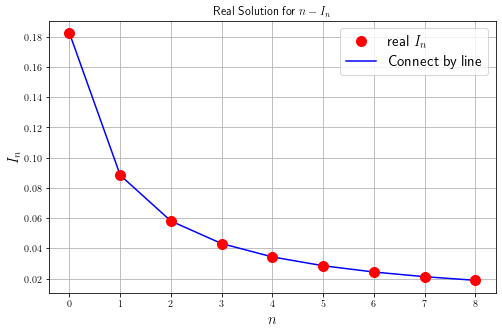

In [6]:
plt.figure(figsize=(8, 5), facecolor="white")
plt.scatter(n_range, In_real, s=100, color="red", zorder=10, label="real $I_n$")
plt.plot(n_range, In_real, color="blue", label="Connect by line")
plt.legend(loc="upper right", fontsize=15)
plt.xlabel("$n$", fontsize=15)
plt.ylabel("$I_n$", fontsize=15)
plt.grid(True)
plt.title("Real Solution for $n-I_n$")
plt.show()

# 从 $0$ 开始的递推

采用递推公式：

$$
I_n = \frac{1}{n}-5I_{n-1}
$$

每一步计算都保留小数点后 $6$ 位：

In [7]:
In_from0 = np.zeros(n+1)
I0 = np.round(np.log(6/5), dec)
In_from0[0] = I0
I0

0.182322

In [8]:
for i in range(1, len(In_from0)):
    In_from0[i] = np.round(1/i - 5*In_from0[i-1], dec)
    pass
print(In_from0)

[ 0.182322  0.088390  0.058050  0.043083  0.034585  0.027075  0.031292
 -0.013603  0.193015]


显然发现这里计算出现了负数值，计算发生了不稳定现象，这里绘图比较一下：

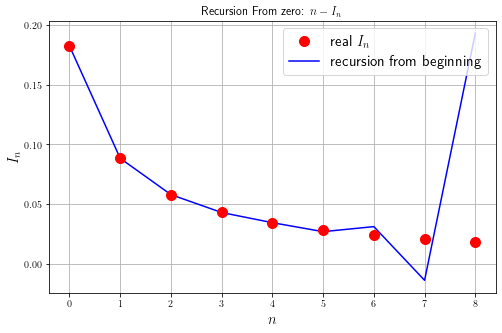

In [9]:
plt.figure(figsize=(8, 5), facecolor="white")
plt.scatter(n_range, In_real, s=100, color="red", zorder=10, label="real $I_n$")
# plt.plot(n_range, In_real, color="blue", label="Connect by line")
plt.plot(n_range, In_from0, color="blue", label="recursion from beginning")
plt.legend(loc="upper right", fontsize=15)
plt.xlabel("$n$", fontsize=15)
plt.ylabel("$I_n$", fontsize=15)
plt.grid(True)
plt.title("Recursion From zero: $n-I_n$")
plt.show()

# 从尾开始的递推

反过来使用公式如下：

$$
I_{n-1}=\frac{1}{5}\left(
    \frac{1}{n}-I_n
\right)
$$

我们可以估计一下 $I_8$ 的值如下：

$$
I_8=\int_0^1 \frac{x^8}{x+5} dx
$$

因此：

$$
\frac{1}{6}\int_0^1 x^8dx \leq I_8 \leq \frac{1}{5}\int_0^1 x^8 dx
$$

显然可以估计范围如下：

$$
I_8 \in \left(
    \frac{1}{54},\frac{1}{45}
\right)
$$

给出其估计值如下：

$$
I_8\approx  \frac{1}{2}\left(\frac{1}{45}+\frac{1}{54}\right)=\frac{11}{18\times 5\times 6}
$$

In [10]:
I8 = np.round(11/18/5/6, dec)
print(I8)

0.02037


接下来从尾巴处进行递推如下：

In [11]:
In_frome = np.zeros(n+1)
In_frome[-1] = I8
for i in range(1, len(In_frome)):
    In_frome[n-i] = np.round((1/(n-i+1) - In_frome[n-i+1])/5, dec)
    pass
print(In_frome)

[ 0.182322  0.088392  0.058039  0.043138  0.034309  0.028456  0.024386
  0.020926  0.020370]


不难看出，似乎和真实值差的值不算大。。。因此画一下如下

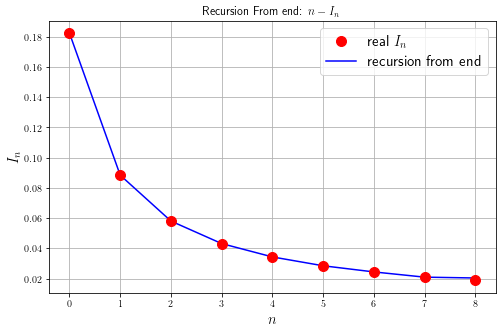

In [12]:
plt.figure(figsize=(8, 5), facecolor="white")
plt.scatter(n_range, In_real, s=100, color="red", zorder=10, label="real $I_n$")
# plt.plot(n_range, In_real, color="blue", label="Connect by line")
plt.plot(n_range, In_frome, color="blue", label="recursion from end")
plt.legend(loc="upper right", fontsize=15)
plt.xlabel("$n$", fontsize=15)
plt.ylabel("$I_n$", fontsize=15)
plt.grid(True)
plt.title("Recursion From end: $n-I_n$")
plt.show()

因此上述的计算表明一件事情，那就是采用误差不会放大的递推计算式子才能保证问题计算的精度，负责只会让误差放大到离谱的地步。与兴趣的同学可以更改程序中 `dec` 值，会发现从 $0$ 开始的递推很大程度上取决于 `dec` 的值。